In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt

# Mark Viti and Marcus Lisman

## Problem 1
### Part 1
### (a)

In [2]:
def activation_function(x, type):
    if type == "sigmoid":
        return 1 / (1 + np.exp(-x))
    elif type == "ReLU":
        return np.maximum(0, x)
    elif type == "linear":
        return x
    else:
        raise ValueError("Unsupported activation function type")

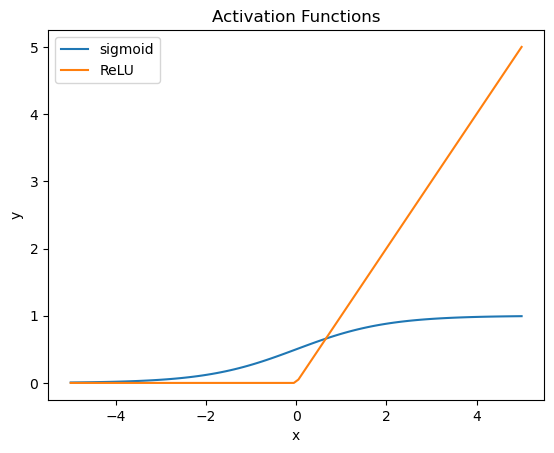

In [3]:
x_values = np.linspace(-5, 5, 100)

y_values_sigmoid = activation_function(x_values, 'sigmoid')
y_values_relu = activation_function(x_values, 'ReLU')

plt.plot(x_values, y_values_sigmoid, label='sigmoid')
plt.plot(x_values, y_values_relu, label='ReLU')
plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Part 2

Okay here me out, I want to actually see what is happening in the NN. Just throwing it in a loop or something is kind of boring and not as cool, so let's walk through each layer step by step. 

In [4]:
layer1 = pd.read_csv('layer1.csv')
later2 = pd.read_csv('layer2.csv')
layer3 = pd.read_csv('layer3.csv')
layer4 = pd.read_csv('layer4.csv')
layer5 = pd.read_csv('layer5.csv')

### Part 3

In [5]:
def feedforward_nn(n_layers, n_neurons, activations, layer_types, weights, biases, input_vec):
    output = np.array(input_vec)
    for i in range(n_layers):
        if layer_types[i] == "FC":  # Fully connected layer
            output = np.dot(weights[i], output) + biases[i]
            print(f"Layer {i+1} - Post linear transformation: {output}")
            output = activation_function(output, activations[i])
            print(f"Layer {i+1} - Post activation ({activations[i]}): {output}")
        else:
            raise ValueError("Unsupported layer type")
    return output

In [6]:
n_layers = 5
n_neurons = [5, 4, 3, 5, 1]
activations = ["ReLU", "sigmoid", "ReLU", "sigmoid", "ReLU"]
layer_types = ["FC", "FC", "FC", "FC", "FC"]
input_vector = [0.1, -0.2, 0.3, -0.4, 0.5]

weights = []
biases = []
for i in range(1, 6):  # We have 5 layers
    data = pd.read_csv(f"layer{i}.csv")
    biases.append(data['b'].values)
    weights.append(data.drop(columns=['b']).values)

final_output = feedforward_nn(n_layers, n_neurons, activations, layer_types, weights, biases, input_vector)
print("Final output of the neural network:", final_output)

Layer 1 - Post linear transformation: [ 0.0976316   0.02795802 -0.22286044 -0.24213525  0.09218016]
Layer 1 - Post activation (ReLU): [0.0976316  0.02795802 0.         0.         0.09218016]
Layer 2 - Post linear transformation: [ 0.05258633 -0.05628207  0.0357589  -0.10550538]
Layer 2 - Post activation (sigmoid): [0.51314355 0.4859332  0.50893877 0.47364809]
Layer 3 - Post linear transformation: [-0.03414519  0.23866093  0.03396447]
Layer 3 - Post activation (ReLU): [0.         0.23866093 0.03396447]
Layer 4 - Post linear transformation: [ 0.02747301  0.03831927  0.09527121 -0.0263907   0.0336014 ]
Layer 4 - Post activation (sigmoid): [0.50686782 0.50957864 0.5237998  0.49340271 0.50839956]
Layer 5 - Post linear transformation: [0.30069756]
Layer 5 - Post activation (ReLU): [0.30069756]
Final output of the neural network: [0.30069756]


### 

### Part 4

If the previous layer had $n$ neurons and the current layer has $m$ neurons, the the weight matrix for for the current layer will be of size $m \times n$. The bias vector will be of size $m \times 1$. That's just how matrix multiplication works.

### Part 5
When an activation function "saturates" when it gets stuck near a certain value. This becomes an issue because then the gradient vanishes (goes to 0), and it becomes very hard for the model to properly learn. Training either slows or stops completely, which can prevent the model from learning anything useful.

### Part 6
### (a)
I have played with the networks. 

### (b)
I tried to come up with the simpliest example I could think of. Let's say we have one layer with 2 neurons feeding to another layer with 1 neuron. The weights are $w_1 = 1$, $w_2 = 1$, and $b = 0$. The activation function is linear (f(x) = x). Then, we have that the output is just $f(w_1 \cdot x_1 + w_2 \cdot x_2 + b) = f(x_1 + x_2) = x_1 + x_2 + b = 2x + b$. Such that $x$ is the input. Then, taking derivatives with respect to either weight or bias we see that 

$\begin{align}
\frac{\partial L}{\partial w_1} &= \frac{\partial L}{\partial x} \cdot \frac{\partial x}{\partial w_1} = \frac{\partial L}{\partial x} \cdot x_1 = \frac{\partial L}{\partial x} \cdot x_2 \\
\frac{\partial L}{\partial w_2} &= \frac{\partial L}{\partial x} \cdot \frac{\partial x}{\partial w_2} = \frac{\partial L}{\partial x} \cdot x_2 = \frac{\partial L}{\partial x} \cdot x_1 \\
\frac{\partial L}{\partial b} &= \frac{\partial L}{\partial x} \cdot \frac{\partial x}{\partial b} = \frac{\partial L}{\partial x} \cdot 1
\end{align}$

So unless $x = 0$, this will never be equal to 0. 

### (c) 
We now need to find an example of a network where approximate derivative of a neural network’s prediction with respect to a single weight parameter or bias parameter is zero.

Let us have a two neuron first layer going to one output. The weights are (1, 1) and we are using the ReLU activation function. The bias is 0. The output is then $f(x_1 + x_2) = \max(0, x_1 + x_2)$. Then, the derivative with respect to the weights is

$\begin{align}
\frac{\partial L}{\partial w_1} &= \frac{\partial L}{\partial x} \cdot \frac{\partial x}{\partial w_1} = \frac{\partial L}{\partial x} \cdot x_1 = \frac{\partial L}{\partial x} \cdot x_2 \\
\frac{\partial L}{\partial w_2} &= \frac{\partial L}{\partial x} \cdot \frac{\partial x}{\partial w_2} = \frac{\partial L}{\partial x} \cdot x_2 = \frac{\partial L}{\partial x} \cdot x_1 \\
\frac{\partial L}{\partial b} &= \frac{\partial L}{\partial x} \cdot \frac{\partial x}{\partial b} = \frac{\partial L}{\partial x} \cdot 1
\end{align}$

Now, the derivative for any input less than 0 is 0. So, if the input is less than 0, then the derivative with respect to the weights will be 0.


## Problem 2

In [7]:
# Define Fibonacci1
def Fibonacci1(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return Fibonacci1(n-1) + Fibonacci1(n-2)

In [8]:
# Define Fibonacci2
def Fibonacci2(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    v = [0] * (n + 1)
    v[0] = 0
    v[1] = 1
    for i in range(2, n + 1):
        v[i] = v[i - 1] + v[i - 2]
    return v[n]

### Part 2

In [9]:
# Verify that Fibonacci1(10) = Fibonacci2(10) = 55
assert Fibonacci1(10) == Fibonacci2(10) == 55
print(f"Fibonacci1(10) = {Fibonacci1(10)}")
print(f"Fibonacci2(10) = {Fibonacci2(10)}")

Fibonacci1(10) = 55
Fibonacci2(10) = 55


### Part 3

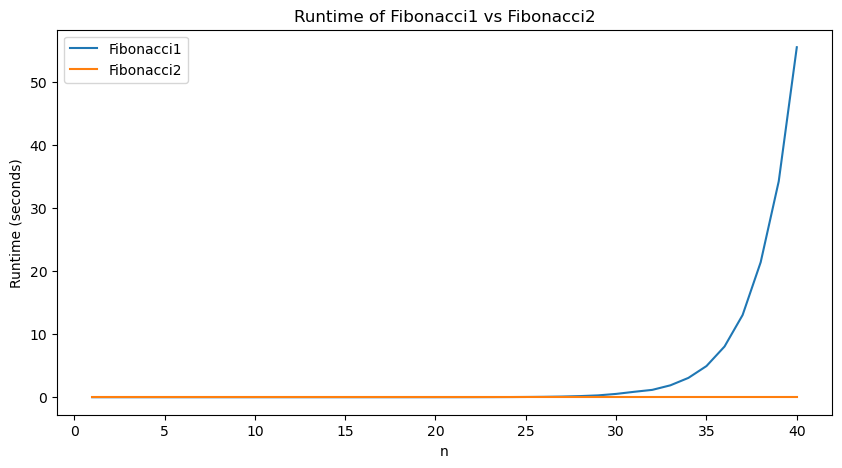

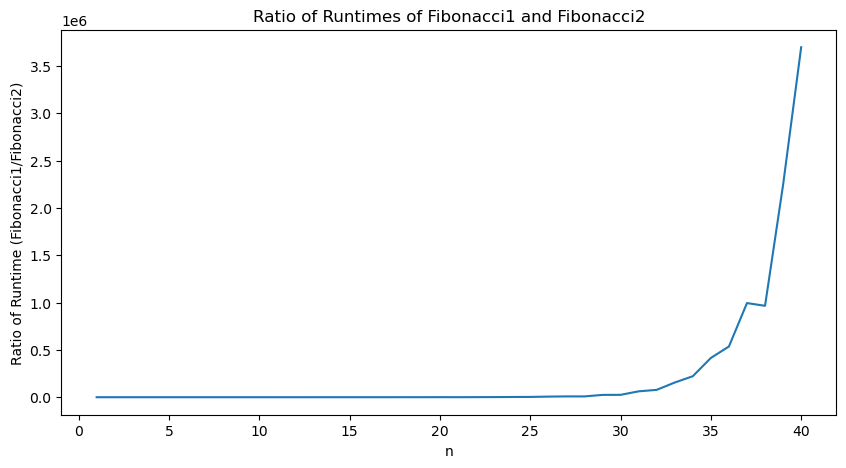

In [10]:
# Run both functions for n = 1, 2, 3, ..., 40 and record the runtime
n_range = range(1, 41)
fib1_times = []
fib2_times = []

for n in n_range:
    start = time.time()
    Fibonacci1(n)
    end = time.time()
    fib1_times.append(end - start)
    
    start = time.time()
    Fibonacci2(n)
    end = time.time()
    fib2_times.append(end - start)

plt.figure(figsize=(10, 5))
plt.plot(n_range, fib1_times, label='Fibonacci1')
plt.plot(n_range, fib2_times, label='Fibonacci2')
plt.xlabel('n')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime of Fibonacci1 vs Fibonacci2')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
ratio_times = [f1/f2 if f2 > 0 else 0 for f1, f2 in zip(fib1_times, fib2_times)]
plt.plot(n_range, ratio_times)
plt.xlabel('n')
plt.ylabel('Ratio of Runtime (Fibonacci1/Fibonacci2)')
plt.title('Ratio of Runtimes of Fibonacci1 and Fibonacci2')
plt.show()


Clearly, Fibonacci2 is faster than Fibonacci1.

### Problem 4
Fibonacci2 is faster because it stores the values of the Fibonacci numbers in a list, so it doesn't have to calculate the same Fibonacci number multiple times. This prevents redundant calculations, and makes the function significantly faster than Fibonacci1 which calculates the same Fibonacci number multiple times.

### Problem 5
For Fibonacci1, the time complexity is O(2^n) because the function calls itself twice for each number n. Thus, for any $n \geq 2$, we need to make $F(n-1) + F(n-2) + 1$ calls to calculate the nth Fibonacci number where $F(n)$ is the number of calls to calculate the nth Fibonacci number. This is clearly exponential time complexity because the number of calls grows exponentially with n.

 For Fibonacci2, the time complexity is O(n) because the function only calculates each Fibonacci number once and stores it in a list. Thus, we only need to make $n - 1$ calls to calculate the nth Fibonacci number. This is linear time complexity because the number of calls grows linearly with n.

### Problem 6
Fibonacci1 is kind of like early methods for training neural networks. Those method were generally recursive in nature. In order to evolve the network, many of the same updating rules had to be calculated many times for the same parts of the network in order to update other parts of the network deeper in the network. This is similar to how Fibonacci1 calculates the same Fibonacci number multiple times in order to make progress farther down the sequence. This is inefficient and slow, just like early neural network training methods.

Fibonacci2 is similar to backpropagation in neural networks. Backpropagation calculates the gradients of the loss function with respect to the weights of the network by storing the intermediate values of the network in a list. This allows the gradients to be calculated efficiently and quickly without having to recalculate the same values multiple times. This is similar to how Fibonacci2 stores the values of the Fibonacci numbers in a list to prevent redundant calculations and make the function faster. This is efficient and fast, just like backpropagation in neural networks.

Therefore, the recursive methods that recalculate the same weights multiple times are really slow and no longer used by the deep learning community. Instead, the more efficient methods that store the intermediate values and prevent redundant calculations are used to train neural networks, particularly backpropagation.